# Start Up:

In [ ]:
#If using google colab:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/GDFT-Net/')

In [1]:
# Imports
from Core import GDFT_Data
from Core import GDFT_Net
from Core import GDFT_Tester
import numpy as np
import matplotlib.pyplot as plt

Data Version: 1.61
Net Version: 1.72
Tester Version: 1.02


In [ ]:
from importlib import reload  
reload(GDFT_Data)
reload(GDFT_Net)
reload(GDFT_Tester)

# Graphical Analysis

In [2]:
x,y= 128,64 # Net Dimensions
Net_Path = "Saved_Models/Saved_Nets/GDFT_Net({0}x{1}).h5".format(x,y)
Net = GDFT_Net.load_GDFT_Net(Net_Path)
Net.describe()

Dimensions: 128x64
nN -> P1: 32 | P2: 32
Epochs -->  P1: 20 | P2: 20
Min Loss -->  P1: 0.10665015131235123 | P2: 0.04234777390956879


In [ ]:
Net.plot_random_Example(SNR=0.8,fs = (15,10))

# Numerical Analysis:

## Running tests on testing data set:

In [ ]:
# Load
x,y = 256,64
path = "Saved_Results/Testers/Tester(V3.0)({0}x{1}).pkl".format(x,y)
tester = GDFT_Tester.load_tester(path)
tester.load_data_from_file('/Users/jonasserry/Google Drive/GDFT-Net/Saved_Results/Testers/Raw_Results/Results(V3.0)(256x64).npy')
tester.save()
print(tester.version)

### Initialising Tester

In [ ]:
# Load
x,y = 512,64
path = "Saved_Results/Testers/Tester(V3.0)({0}x{1}).pkl".format(x,y)
tester = GDFT_Tester.load_tester(path)
tester.load_Net()
print(tester.version)

In [ ]:
# New Tester
x,y = 256,64
Tester_Path= "Saved_Results/Testers/Tester(V3.0)({0}x{1}).pkl".format(x,y)
tester=GDFT_Tester.GDFT_Net_Tester(Tester_Path,Net.path,(x,y))
tester.load_Net()
print(tester.version)

### Running Tests

In [ ]:
# Test Using Data Set
DS = GDFT_Data.load_Data_Set("Saved_Data/Test_Data/TEST(V3.0)x: {0}.pkl".format(x))
tester.run_RMSE_Testing(DS=DS)

tester.save_data_to_file("Saved_Results/Results(V3.0)({0}x{1})".format(x,y))
tester.save()

In [ ]:
# Simulate New Data
SNRs = np.linspace(0.1,2.0,20)
n = 100
tester.run_RMSE_Testing(n,SNRs)

tester.save_data_to_file("Saved_Results/Testers/Raw_Results/Results(NOTDS)({0}x{1})".format(x,y))
tester.save()

## Ploting Results from Specific Net:

In [3]:
# Load Tester of desired Net
x,y = 32,64
path = "Saved_Results/Testers/Tester(V3.0)({0}x{1}).pkl".format(x,y)
tester = GDFT_Tester.load_tester(path)


### Standard RMSE Data


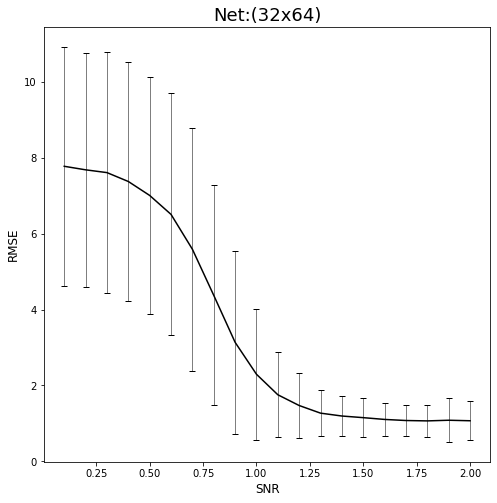

In [4]:
SNRs,means,stds = tester.get_RMSE_Data()
tester.plot_this_data(SNRs,means,stds,title="Net:({0}x{1})".format(x,y))

### Mean Error at Specified Index


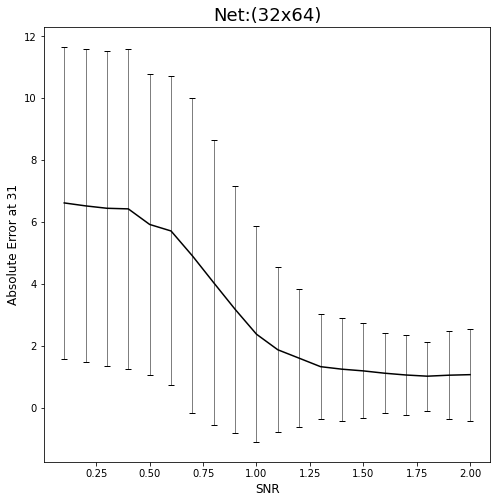

In [5]:
i = 31
SNRs,means,stds = tester.get_error_at_index(i)
tester.plot_this_data(SNRs,means,stds,title="Net:({0}x{1})".format(x,y),ylabel="Absolute Error at {0}".format(i))

### Mean Error over all Indeces at specific SNR

Clear here that error is largest towards the beggining and end of frame.
This is as expected: less information is availible here to interpolate from. Shows that network is not using historical information as such, but rather "adjacent" information to improve predictions. 

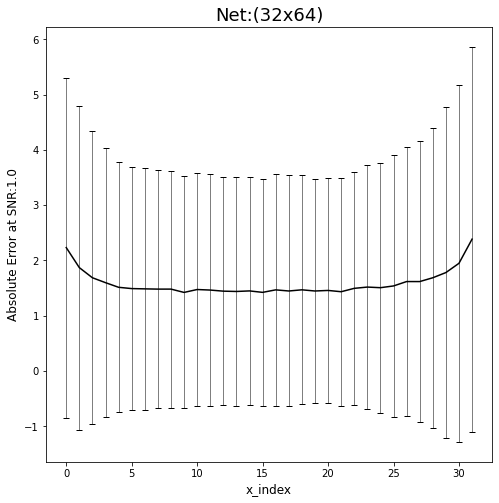

In [6]:

SNR=1.0
SNRs,means,stds = tester.get_error_variation_at_SNR(SNR)
tester.plot_this_data(SNRs,means,stds,title="Net:({0}x{1})".format(x,y),xlabel="x_index",ylabel="Absolute Error at SNR:{0}".format(SNR))

### Maximum Error per frame over SNR



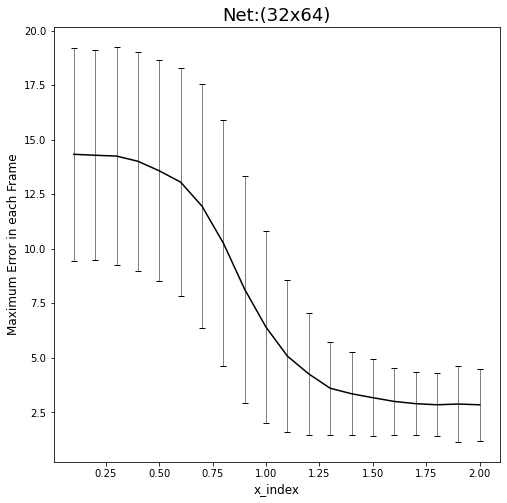

In [7]:
SNRs,means,stds = tester.get_max_error()
tester.plot_this_data(SNRs,means,stds,title="Net:({0}x{1})".format(x,y),xlabel="x_index",ylabel="Maximum Error in each Frame".format(SNR))

# Comparing Nets of Different Dimensions

## Standard RMSE Comparison without accounting for differing RMSE sample sizes:

Text(0, 0.5, 'RMSE ($\\lambda_0$)')

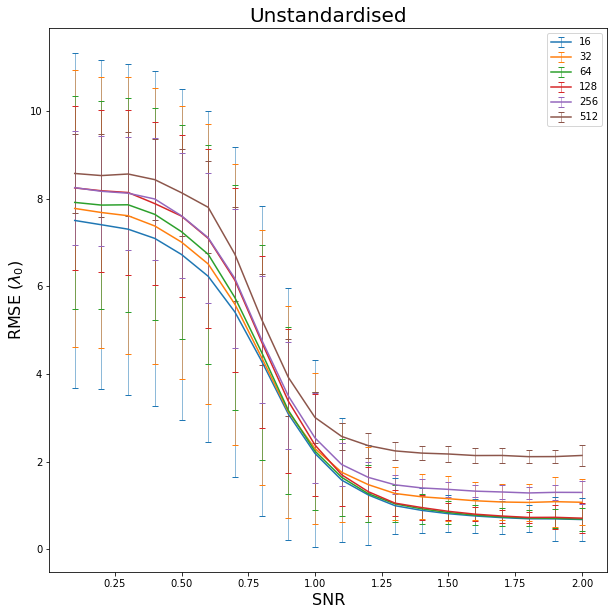

In [8]:
plt.figure(figsize=(10,10))
corr=1

for x in [16,32,64,128,256,512]:
    Tester_Path= "Saved_Results/Testers/Tester(V3.0)({0}x{1}).pkl".format(x,64)
    tester=GDFT_Tester.load_tester(Tester_Path)
    means=[]
    stds=[]
    SNRs = []
    for SNR in sorted(tester.errors.keys()):
        SNRs.append(SNR)
        errors = np.array(tester.errors[SNR]) 
        rmses = np.sqrt(np.mean((errors**2),axis=1))
        means.append(np.mean(rmses))
        stds.append(np.std(rmses))
    plt.errorbar(SNRs,means,yerr=stds,capsize=3,elinewidth=0.5,label=x) 


plt.legend()
plt.xlabel("SNR",fontsize=16)
plt.title("Unstandardised",fontsize=20)
plt.ylabel(r"RMSE ($\lambda_0$)",fontsize=16)

Now calculate RMSE over an identical window (x=64) for all networks.

 Note that this is possible because adjacent frames are continuous with each other for the test data set (same delay simulation instance). 

Text(0, 0.5, 'RMSE ($\\lambda_0$)')

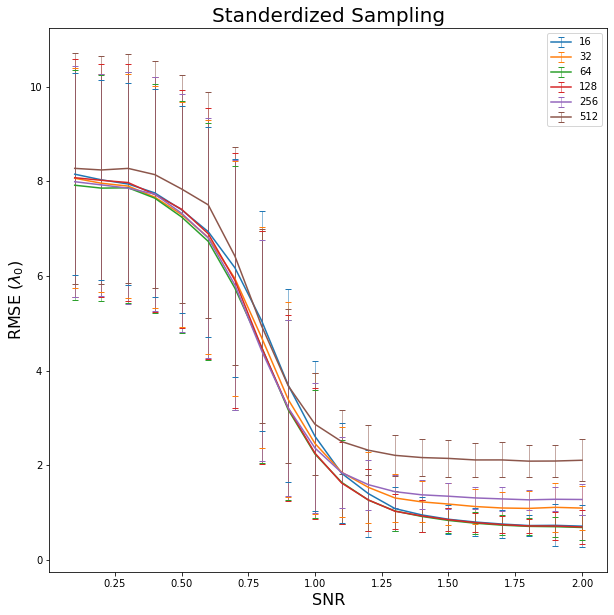

In [9]:
plt.figure(figsize=(10,10))
corr=1

for x in [16,32,64,128,256,512]:
    Tester_Path= "Saved_Results/Testers/Tester(V3.0)({0}x{1}).pkl".format(x,64)
    tester=GDFT_Tester.load_tester(Tester_Path)
    means=[]
    stds=[]
    SNRs = []
    for SNR in sorted(tester.errors.keys()):
        SNRs.append(SNR)
        s=64
        errors = np.array(tester.errors[SNR]).reshape((int(len(tester.errors[SNR])*x/s),s)) #Reshape data for identical sampling
        rmses = np.sqrt(np.mean((errors**2),axis=1))
        means.append(np.mean(rmses))
        stds.append(np.std(rmses))
    plt.errorbar(SNRs,means,yerr=stds,capsize=3,elinewidth=0.5,label=x) 


plt.legend()
plt.xlabel("SNR",fontsize=16)
plt.title("Standerdized Sampling",fontsize=20)
plt.ylabel(r"RMSE ($\lambda_0$)",fontsize=16)

Note RMSEs and their associated standard deviation (error bars) are now almost identical (within error). 

Note: I'm not sure whats happening above SNR=1.0 but I don't think its significant. Seems to be some issue with the training process. The second pass network is very difficult to train for larger dimensions. Ignore x=512 for now...

## Some other Miscallaneous plots that might or might not be of interest

### Average error per pixel over width of frame between networks at a given SNR

Text(0, 0.5, 'Error ($\\lambda_0$)')

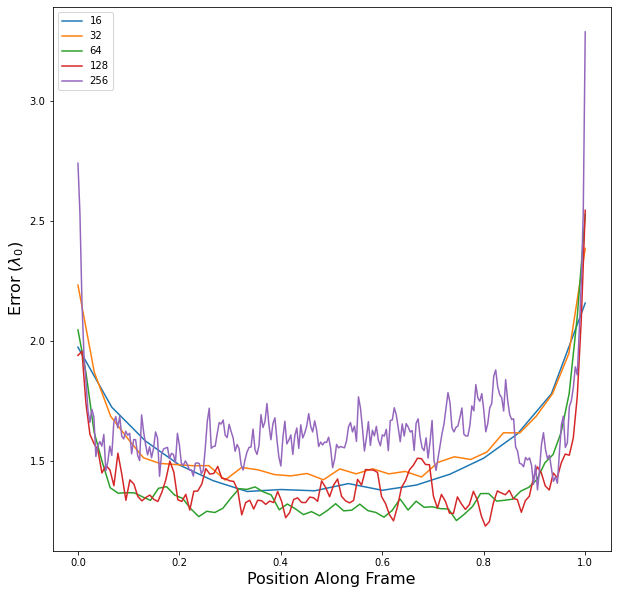

In [10]:
SNR = 1.0
plt.figure(figsize=(10,10))
corr=1
for x in [16,32,64,128,256]:
    Tester_Path= "Saved_Results/Testers/Tester(V3.0)({0}x{1}).pkl".format(x,64)
    tester=GDFT_Tester.load_tester(Tester_Path)
    inds,means,stds = tester.get_error_variation_at_SNR(SNR)
    #print(np.where(means<1.2)[0][0])
    x_frame= np.linspace(0.0,1.0,len(means))
    plt.plot(x_frame,means,label=x) 


plt.legend()
plt.xlabel("Position Along Frame",fontsize=16)

plt.ylabel(r"Error ($\lambda_0$)",fontsize=16)

I included the above because it may actually give an idea of what the "memory span" of these networks is. It appears that the number of pixels between the "edges", where error is higher, and the more stable minimum towards the centre is actually fairly consistent between networks. See below for clearer image of this. 

Text(0, 0.5, 'Error ($\\lambda_0$)')

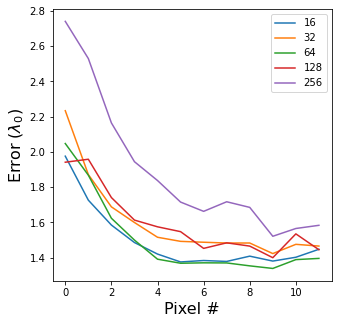

In [11]:
SNR = 1.0
plt.figure(figsize=(5,5))
corr=1
for x in [16,32,64,128,256]:
    Tester_Path= "Saved_Results/Testers/Tester(V3.0)({0}x{1}).pkl".format(x,64)
    tester=GDFT_Tester.load_tester(Tester_Path)

    inds,means,stds = tester.get_error_variation_at_SNR(SNR)
    #print(np.where(means<1.2)[0][0])
    plt.plot(means[0:12],label=x) 


plt.legend()
plt.xlabel("Pixel #",fontsize=16)

plt.ylabel(r"Error ($\lambda_0$)",fontsize=16)

Text(0, 0.5, 'First pixel at which error < mean error ')

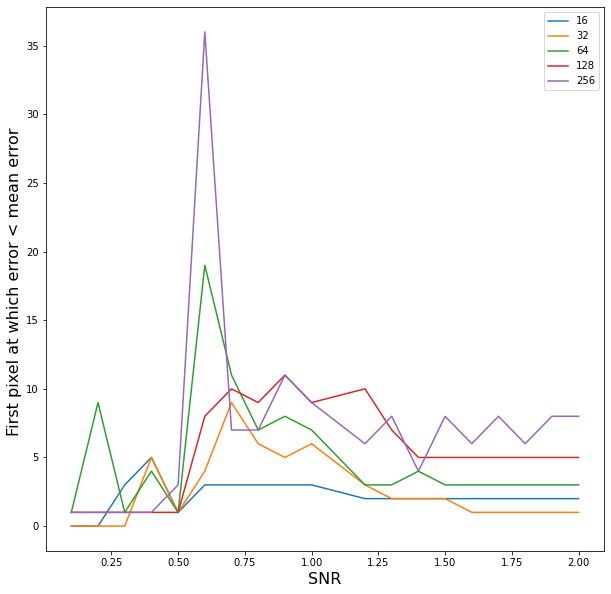

In [12]:
SNRs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]
plt.figure(figsize=(10,10))
corr=1
for x in [16,32,64,128,256]:
    Tester_Path= "Saved_Results/Testers/Tester(V3.0)({0}x{1}).pkl".format(x,64)
    tester=GDFT_Tester.load_tester(Tester_Path)
    
    inds = []
    for SNR in SNRs:
        _,means,stds = tester.get_error_variation_at_SNR(SNR)
        mean = np.mean(means)
        #print(x,SNR,mean)
        inds.append(x-1-np.where(means<mean)[0][-1])
    #print(np.where(means<1.2)[0][0])
    plt.plot(SNRs,inds,label=x) 


plt.legend()
plt.xlabel("SNR",fontsize=16)

plt.ylabel("First pixel at which error < mean error ",fontsize=16)

While data is very noisy (trying to figure out a way to reduce this), it seems like there is a similair trend in "memory span" at different SNRs. Below SNR=0.5 it appears that very little can be gained from adjacent information, which is to be expected as the signal is all but gone. This could be an interesting "cut off" point for the networks. 

From SNR = 0.6 however, it appears that the "memory span" of the networks decreases with increasing SNR, which again makes intuitive sense. As the signal gets stronger, there is less need to use adjacent information to attain better estimates. Again this is very perliminary analysis and needs much refinement to be of any worth. 

## Standard deviation in error (measured over fixed sample size)

Text(0, 0.5, 'Var ($\\lambda_0$)')

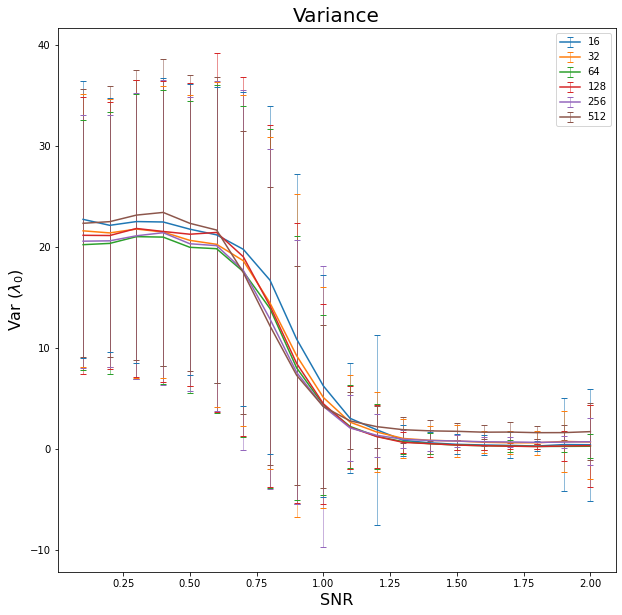

In [13]:
plt.figure(figsize=(10,10))
corr=1
s=64 # sample size for evaluation

for x in [16,32,64,128,256,512]:
    Tester_Path= "Saved_Results/Testers/Tester(V3.0)({0}x{1}).pkl".format(x,64)
    tester=GDFT_Tester.load_tester(Tester_Path)
    stds=[]
    std_std=[]
    SNRs = []
    for SNR in sorted(tester.errors.keys()):
        SNRs.append(SNR)
        errors = np.array(tester.errors[SNR]).reshape((int(len(tester.errors[SNR])*x/s),s)) #Reshape data for identical sampling
        std = np.std(np.abs(errors),axis=1)**2
        stds.append(np.mean(std))
        std_std.append(np.std(std))
    plt.errorbar(SNRs,stds,yerr=std_std,capsize=3,elinewidth=0.5,label=x) 


plt.legend()
plt.xlabel("SNR",fontsize=16)
plt.title("Variance",fontsize=20)
plt.ylabel(r"Var ($\lambda_0$)",fontsize=16)

variance of errors evolves similairly to RMSE (think that might be a mathematical truism however)